### Try-it 8.1: The "Best" Model

This module was all about regression and using Python's scikitlearn library to build regression models.  Below, a dataset related to real estate prices in California is given. While many of the assignments you have built and evaluated different models, it is important to spend some time interpreting the resulting "best" model.  


Your goal is to build a regression model to predict the price of a house in California.  After doing so, you are to *interpret* the model.  There are many strategies for doing so, including some built in methods from scikitlearn.  One example is `permutation_importance`.  Permutation feature importance is a strategy for inspecting a model and its features importance.  

Take a look at the user guide for `permutation_importance` [here](https://scikit-learn.org/stable/modules/permutation_importance.html).  Use  the `sklearn.inspection` modules implementation of `permutation_importance` to investigate the importance of different features to your regression models.  Share these results on the discussion board.

In [118]:
import pandas as pd
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import set_config

set_config(display="diagram") 

In [104]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cali = pd.read_csv('C:/Users/hande/Downloads/housing.csv')

In [4]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df = cali.copy()

In [7]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [8]:
# Convert object types to categorical:
list_str_obj_cols = df.columns[df.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    df[str_obj_col] = df[str_obj_col].astype("category")

In [9]:
df.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity       category
dtype: object

In [10]:
df.shape

(20640, 10)

In [11]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [13]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
longitude,20640.0,NaN,NaN,NaN,-119.569704,2.003532,-124.35,-121.8,-118.49,-118.01,-114.31
latitude,20640.0,NaN,NaN,NaN,35.631861,2.135952,32.54,33.93,34.26,37.71,41.95
housing_median_age,20640.0,NaN,NaN,NaN,28.639486,12.585558,1.0,18.0,29.0,37.0,52.0
total_rooms,20640.0,NaN,NaN,NaN,2635.763081,2181.615252,2.0,1447.75,2127.0,3148.0,39320.0
total_bedrooms,20433.0,NaN,NaN,NaN,537.870553,421.38507,1.0,296.0,435.0,647.0,6445.0
population,20640.0,NaN,NaN,NaN,1425.476744,1132.462122,3.0,787.0,1166.0,1725.0,35682.0
households,20640.0,NaN,NaN,NaN,499.53968,382.329753,1.0,280.0,409.0,605.0,6082.0
median_income,20640.0,NaN,NaN,NaN,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,NaN,NaN,NaN,206855.816909,115395.615874,14999.0,119600.0,179700.0,264725.0,500001.0
ocean_proximity,20640,5,<1H OCEAN,9136,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Missing values:
df.isnull().values.any()


True

In [15]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [16]:
df['total_bedrooms'].fillna(0, inplace = True)

In [17]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

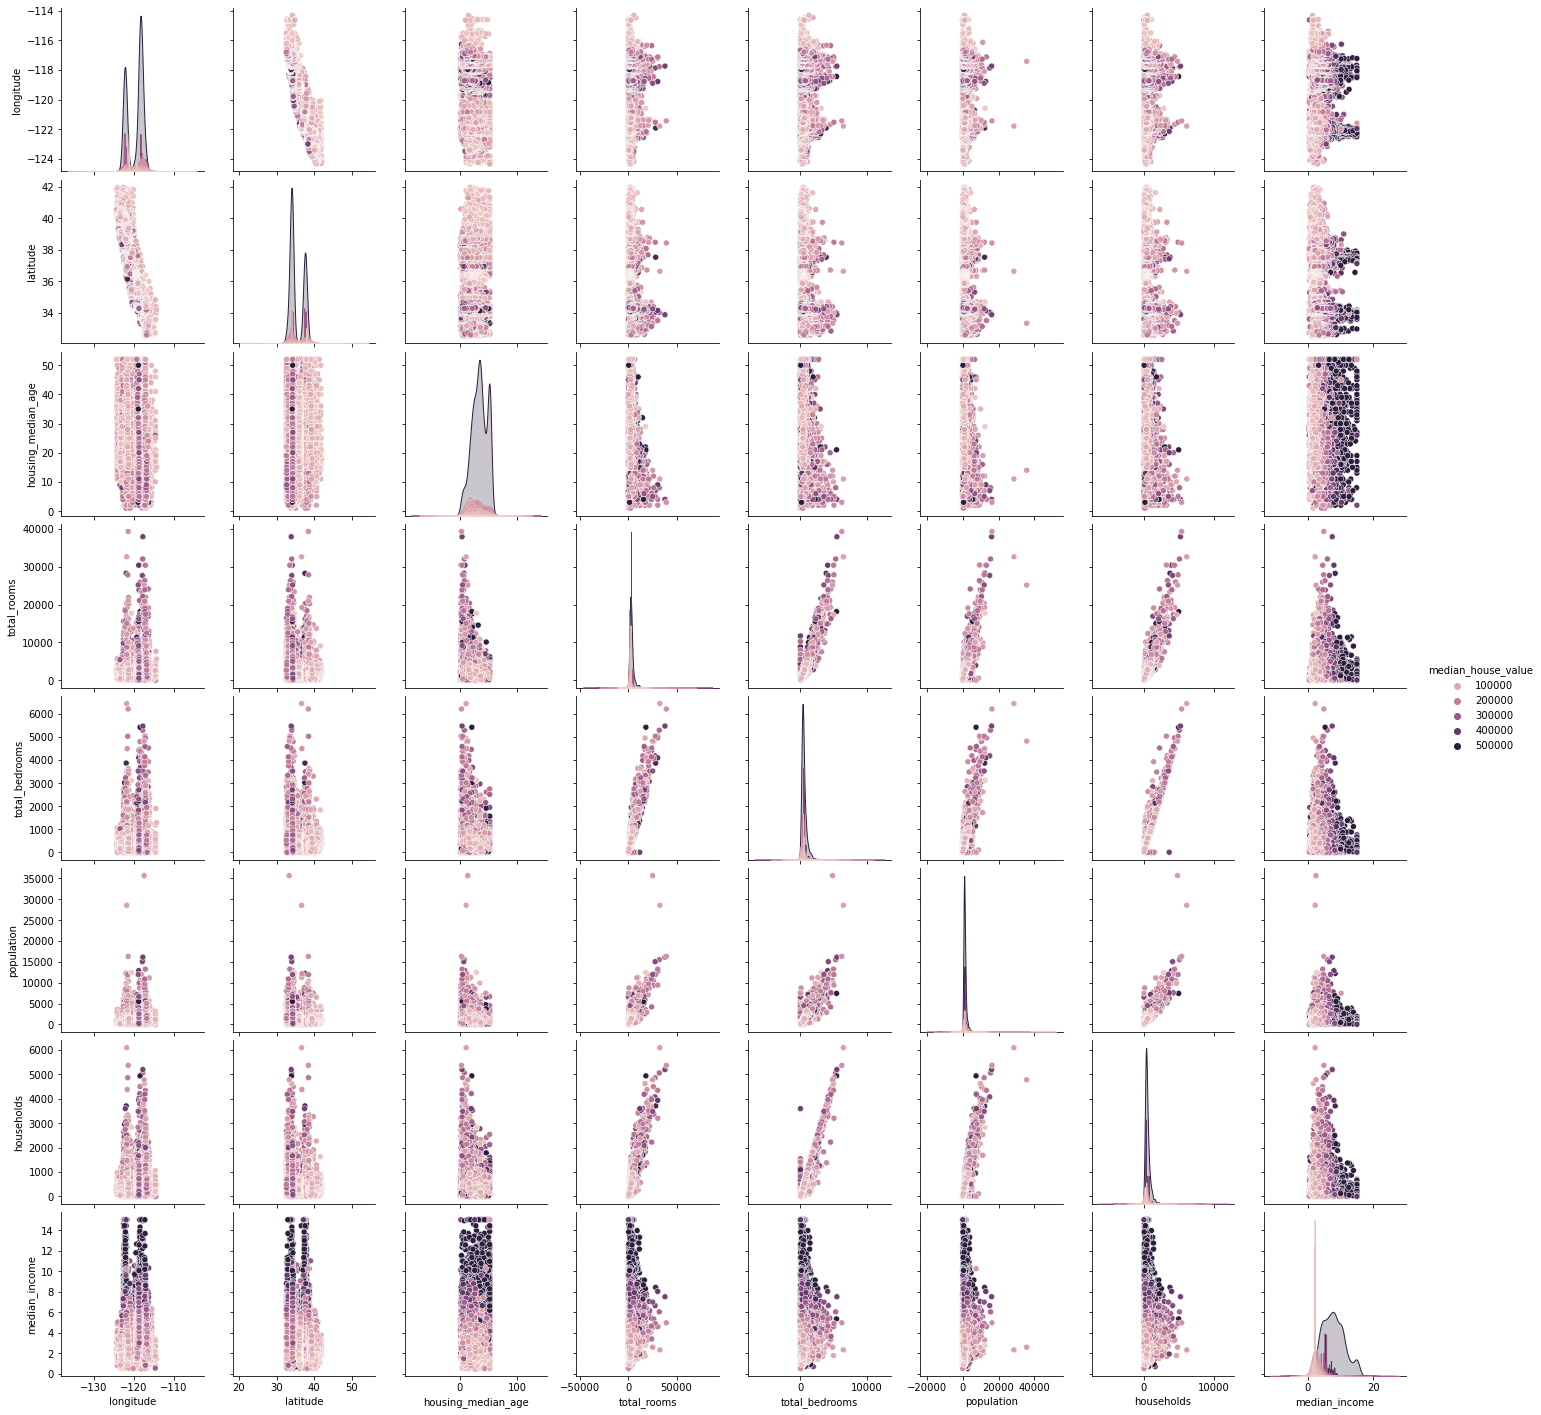

In [18]:
sns.pairplot(df, hue = 'median_house_value');

C:\Users\hande\AppData\Local\Temp\ipykernel_4300\2355749270.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True, fmt=".1f")


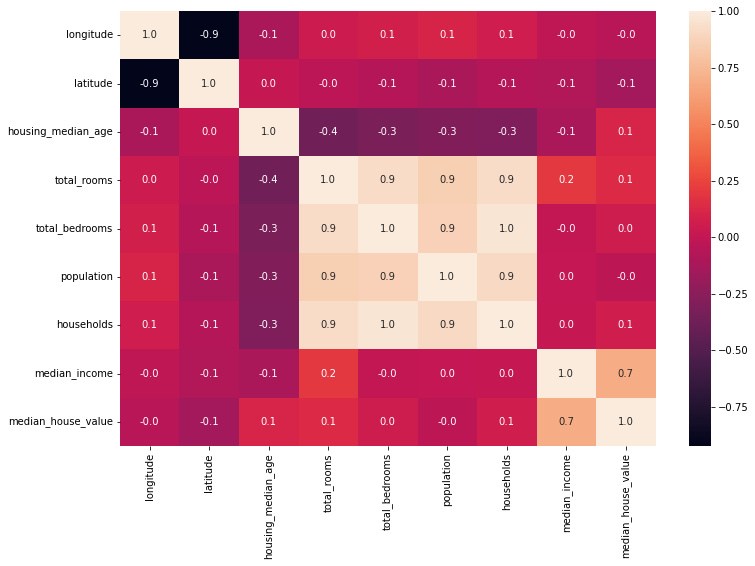

In [19]:
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), annot= True, fmt=".1f")
plt.show()

* **Regression Plot:**

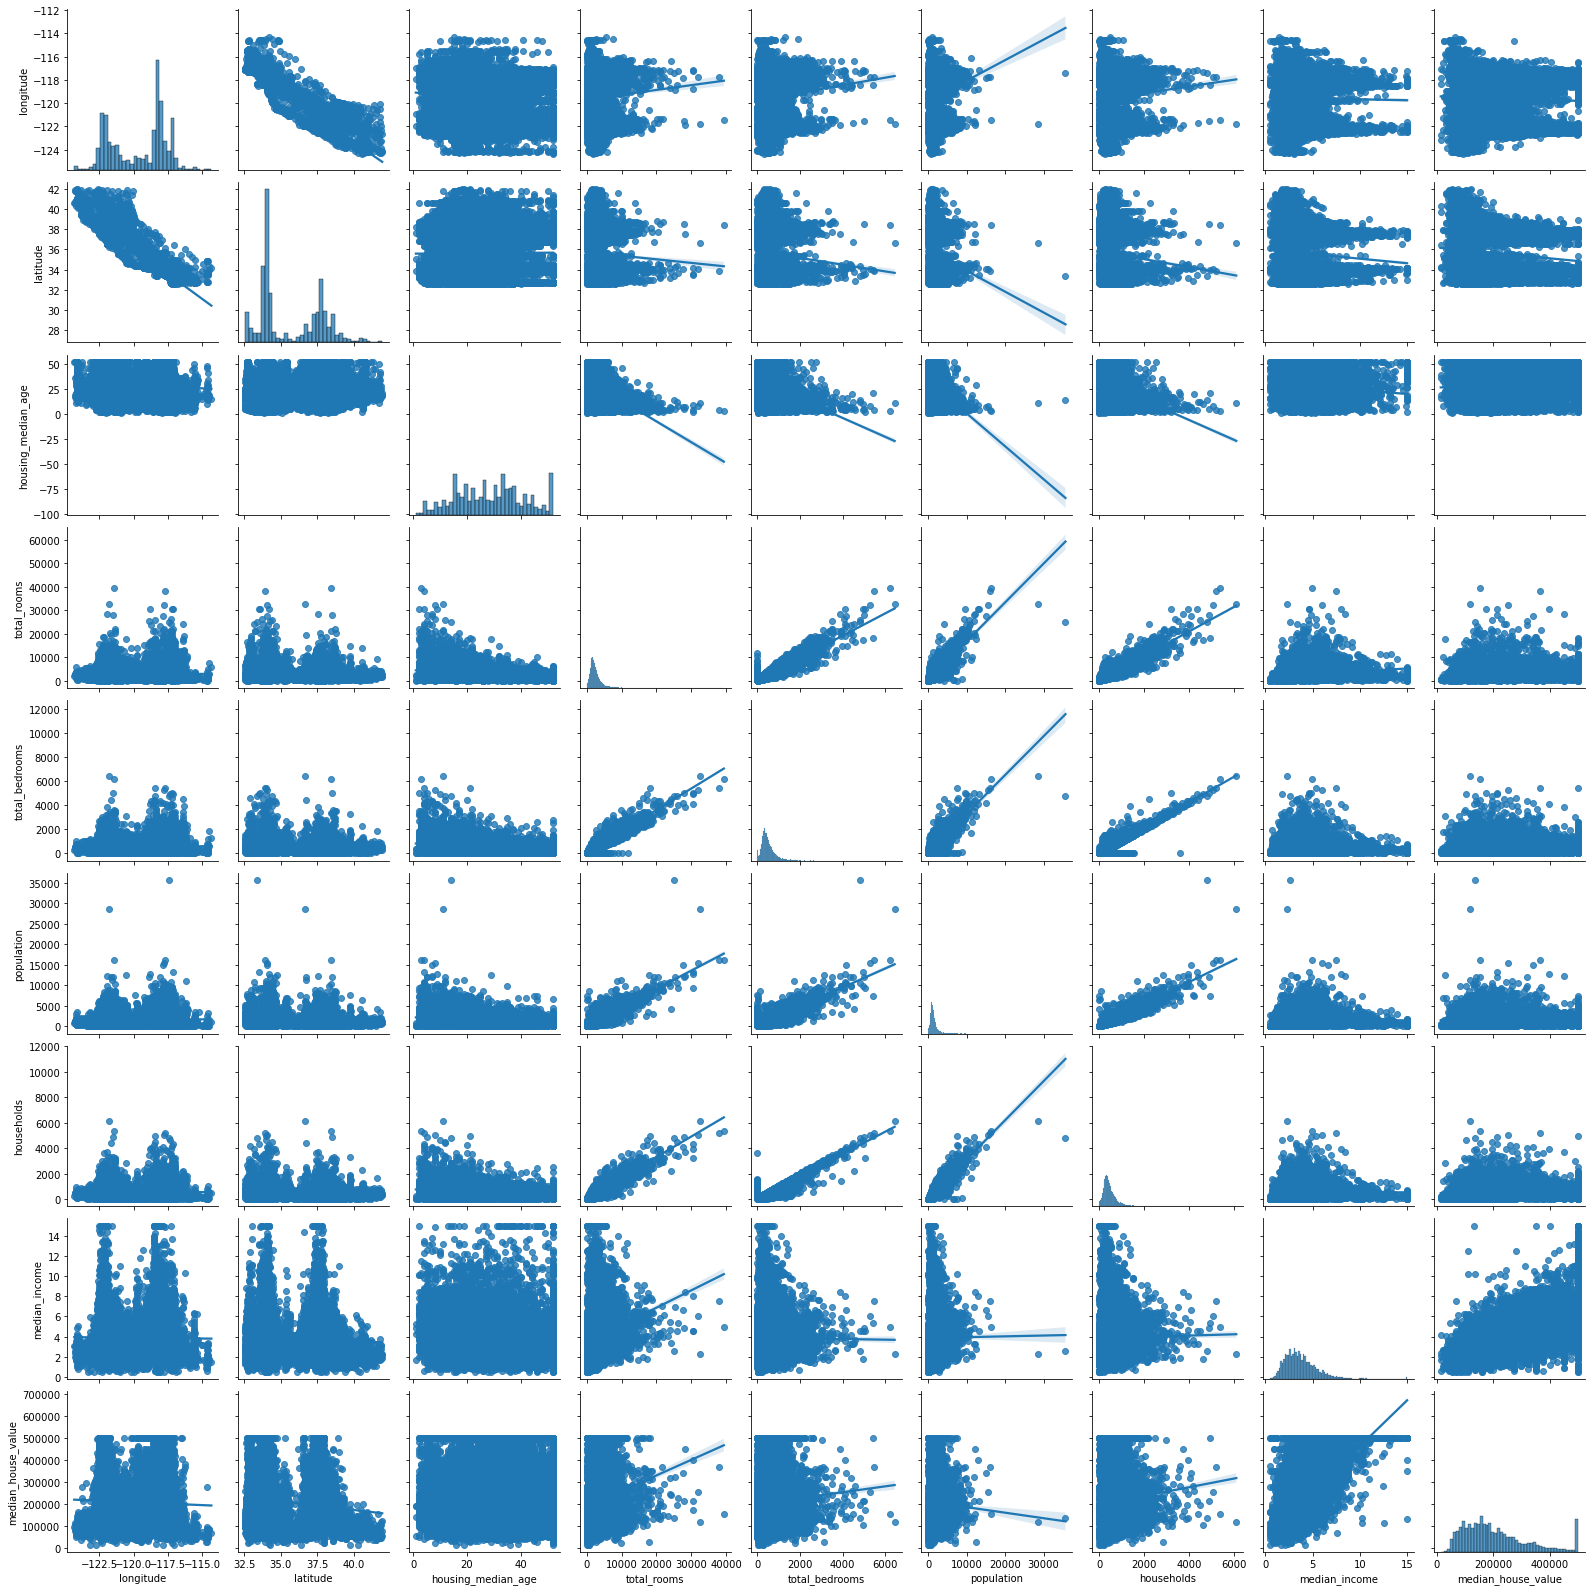

In [20]:
sns.pairplot(df, kind  ="reg");

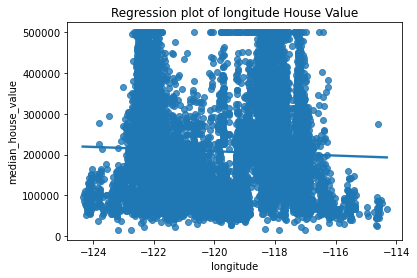

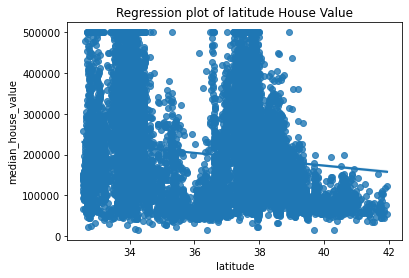

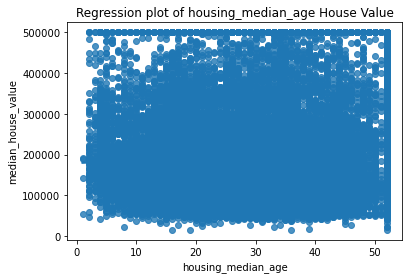

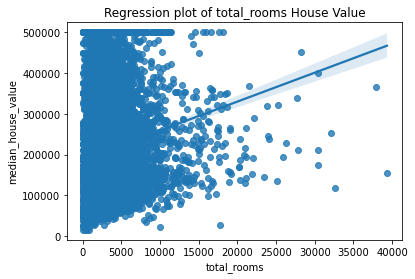

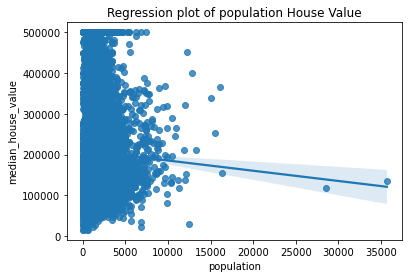

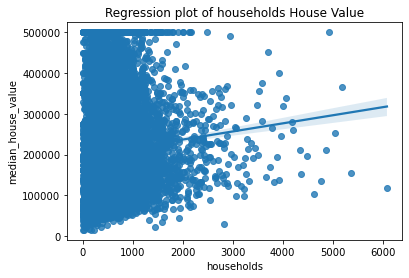

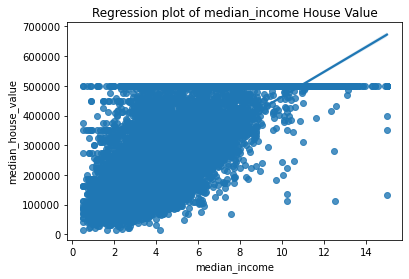

In [21]:
variables = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households','median_income']

for var in variables:
    plt.figure()
    sns.regplot(x = var, y='median_house_value', data= df).set(title=f'Regression plot of {var} House Value')

**Prices like based on Ocean Proximity:**

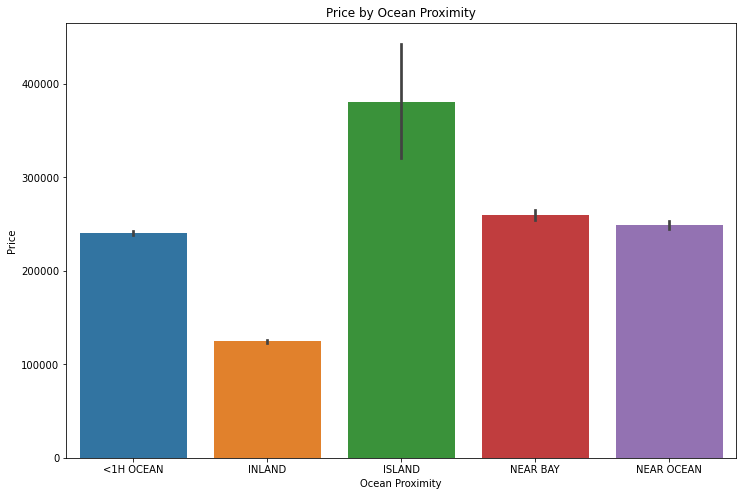

In [114]:

plt.subplots(figsize=(12,8))
sns.barplot(data=df, x='ocean_proximity', y='median_house_value')
plt.title('Price by Ocean Proximity')
plt.xlabel('Ocean Proximity');
plt.ylabel('Price');
plt.show()

In [115]:
df = pd.get_dummies(df, columns=['ocean_proximity'])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0


In [ ]:
# Create X and y:

X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households','median_income']]
y = df['median_house_value']

# Training, Validation & Testing:

In [116]:
# Spliting our data: 60/20/20.

# Step1: Split the datat in training and remaining datasets
X_train, X_rem, y_train, y_rem = train_test_split(X,y, random_state=32, train_size=0.6)

# Step2: The validation and test set size should be equal which is 20% each of overall of our data.
# valid_size = .50 (which is 50% of the remaining data)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, random_state=32, test_size=0.5)

# Shapes of our sets:
print(f'X_train: {X_train.shape} - y_train:{y_train.shape}')
print(f'X_valid: {X_valid.shape} - y_valid:{y_valid.shape}')
print(f'X_test: {X_test.shape} - y_test:{y_test.shape}')

X_train: (12384, 14) - y_train:(12384,)
X_valid: (4128, 14) - y_valid:(4128,)
X_test: (4128, 14) - y_test:(4128,)


# MODEL BUILDING

## Without "Ocean Proximity"

In [22]:
from warnings import filterwarnings
filterwarnings('ignore')

In [23]:
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households','median_income']]
y = df['median_house_value']
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_
model.coef_

array([-4.20736718e+04, -4.22897110e+04,  1.12525506e+03, -1.77189328e+00,
       -4.32017964e+01,  1.49399726e+02,  3.83488292e+04])

In [24]:
model.score(X,y)

0.6323562975019454

In [25]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [26]:
lr = LinearRegression().fit(X_train, y_train)

In [27]:
lr.intercept_

-3484951.8621567

In [28]:
lr.coef_

array([-4.17783000e+04, -4.19374675e+04,  1.14862311e+03, -1.63616970e+00,
       -4.21678231e+01,  1.47074533e+02,  3.84269729e+04])

In [29]:
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
results = pd.DataFrame({'Actual': y_test, 'Predicted': lr.predict(X_test)})
print(results)

         Actual      Predicted
20046   47700.0   59777.257601
3024    45800.0  179013.772375
15663  500001.0  318731.423450
20484  218600.0  273270.520074
9814   278000.0  269796.723913
...         ...            ...
17505  237500.0  217707.657452
13512   67300.0   86090.883571
10842  218400.0  269181.156346
16559  119400.0  128318.742426
5786   209800.0  208845.833461

[6192 rows x 2 columns]


In [30]:
from sklearn.metrics import mean_squared_error, r2_score
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(mse_train)
print(mse_test)

4934151136.836834
4806514243.032278


In [31]:
lr.score(X_test, y_test)

0.6338005814513433

In [32]:
lr.score(X_train, y_train)

0.6316962042277792

In [33]:
r = permutation_importance(lr, X, y,
...                            n_repeats=30, random_state = 42)

In [34]:
for i in r.importances_mean.argsort()[::-1]:
...     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
...         print(f" {df.columns[i]:<8}"
...               f" {r.importances_mean[i]:.3f}"
...               f" +/- {r.importances_std[i]:.3f}")

 latitude 1.207 +/- 0.013
 longitude 1.053 +/- 0.010
 households 0.797 +/- 0.007
 population 0.471 +/- 0.005
 total_bedrooms 0.346 +/- 0.004
 housing_median_age 0.031 +/- 0.001
 total_rooms 0.002 +/- 0.000


## With "Ocean Proximity" & creating Pipeline

In [35]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
import numpy as np
import pandas as pd  


In [36]:
#splitting the data
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'households','population', 'median_income', 'ocean_proximity']]
y = df['median_house_value']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [38]:
from sklearn.pipeline import make_pipeline

poly_ohe_d3 = make_column_transformer((PolynomialFeatures(degree = 3), make_column_selector(dtype_include=np.number)),
                                     (OneHotEncoder(drop = 'if_binary', sparse = False), ['ocean_proximity']), remainder = 'passthrough')

In [39]:
transformer = make_column_transformer((OneHotEncoder(), ['ocean_proximity']), remainder = 'passthrough')
transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns = transformer.get_feature_names())
transformed_df

,onehotencoder__x0_<1H OCEAN,onehotencoder__x0_INLAND,onehotencoder__x0_ISLAND,onehotencoder__x0_NEAR BAY,onehotencoder__x0_NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.0,0.0,0.0,1.0,0.0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,0.0,0.0,0.0,1.0,0.0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,0.0,0.0,0.0,1.0,0.0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,0.0,1.0,0.0,0.0,0.0,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,0.0,1.0,0.0,0.0,0.0,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,0.0,1.0,0.0,0.0,0.0,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [40]:
pipe2 = Pipeline([('transformer', transformer),
                 ('linreg', LinearRegression())])
pipe2.fit(X,y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('linreg', LinearRegression())])

In [41]:
pipe = Pipeline([('transformer', poly_ohe_d3),
                ('linreg', LinearRegression())])
pipe.fit(X, y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('polynomialfeatures',
                                                  PolynomialFeatures(degree=3),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E304F422E0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False),
                                                  ['ocean_proximity'])])),
                ('linreg', LinearRegression())])

In [42]:
train_mse = mean_squared_error(y_train, pipe.predict(X_train))
print(train_mse)

3516010047.121483


In [43]:
test_mse = mean_squared_error(y_test, pipe.predict(X_test))
print(test_mse)

3484044340.8943243


In [44]:
r = permutation_importance(pipe, X, y,
...                            n_repeats=30, random_state = 42)

In [45]:
r2 = permutation_importance(pipe2, X, y,
...                            n_repeats=30, random_state = 42)

In [46]:
for i in r.importances_mean.argsort()[::-1]:
...         print(f"{cali.columns[i]:<8}"
...               f"{r.importances_mean[i]:.3f}"
...               f" +/- {r.importances_std[i]:.3f}")

total_bedrooms30.785 +/- 5.179
total_rooms28.618 +/- 3.242
population4.083 +/- 2.030
latitude2.258 +/- 0.635
longitude1.593 +/- 0.119
households0.858 +/- 0.052
housing_median_age0.248 +/- 0.158
median_income0.037 +/- 0.001


In [47]:
for i in r2.importances_mean.argsort()[::-1]:
...         print(f"{cali.columns[i]:<8}"
...               f"{r2.importances_mean[i]:.3f}"
...               f" +/- {r2.importances_std[i]:.3f}")

households0.760 +/- 0.007
total_bedrooms0.424 +/- 0.005
latitude0.407 +/- 0.006
longitude0.387 +/- 0.005
population0.342 +/- 0.004
median_income0.058 +/- 0.001
housing_median_age0.025 +/- 0.001
total_rooms0.000 +/- 0.000


#  OneHot Encoder

In [48]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(cali[['ocean_proximity']])
print(transformed.toarray())

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [49]:
print(ohe.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [50]:
df[ohe.categories_[0]] = transformed.toarray()

In [51]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0.0,1.0,0.0,0.0,0.0


# Using Column Transformer

In [52]:
df1 = pd.read_csv('C:/Users/hande/Downloads/housing.csv')
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [53]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['ocean_proximity']),
    remainder='passthrough')

transformed = transformer.fit_transform(df1)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)

In [54]:
transformed_df.head()

,onehotencoder__x0_<1H OCEAN,onehotencoder__x0_INLAND,onehotencoder__x0_ISLAND,onehotencoder__x0_NEAR BAY,onehotencoder__x0_NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.0,0.0,0.0,1.0,0.0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,0.0,0.0,0.0,1.0,0.0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,0.0,0.0,0.0,1.0,0.0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


* **FINDINGS:**

* **Data Exploratory Analysis:**
* Ocean_proximity´s type is "Object". I converted it to category because some functions may treat it as a string because of missunderstanding of its structure.
* (20640, 10): Data has 20.640 samples and 10 features.
* Exploring missing values: total_bedrooms= 207 and all NAN's in the data set can be assigned a value of "0".
* Pair Plot results: There are some strong correlation between total_income with total_bedrooms, total_rooms and households. Also, 'longitude', 'latitude' do not have any meaninful results.
* Heatmap results: There are some strong correlation between total_income with total_bedrooms, total_rooms, population, income and households.


* **Creating a pipe line with Polynomial Features, and Linear Regression**:
* **mse_train:** 4934151136.836834
* **mse_test:** 4806514243.032278
* **Pipe_train:** 3516010047.121483
* **Pipe_test:** 3484044340.8943243

* **Permutation Importance:**
* Latitude and longitude have been more effective.

